In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.linear_model import LinearRegression

In [12]:
img=Image.open(r'ICICIBANK.png')
img=img.crop((0,120,1700,700))
arr=np.asarray(img)
n_arr=255-arr[:,:,1]

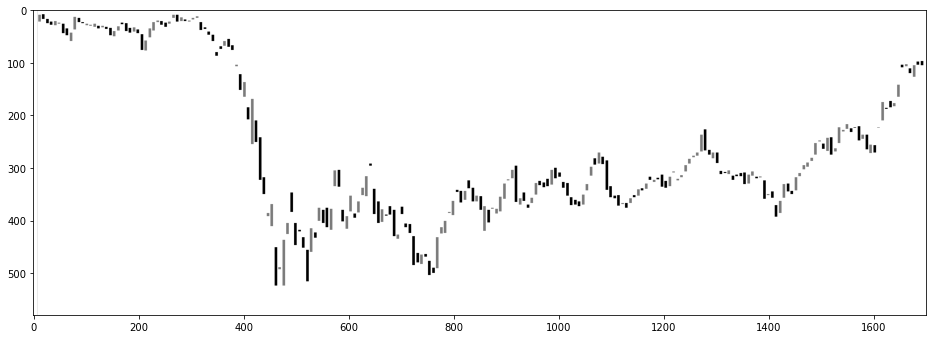

In [13]:
plt.figure(figsize=(16,6))
plt.imshow(255-n_arr,cmap="gray")

In [14]:
# northward = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
# fillow1 = filters.convolve(n_arr,northward)
# plt.figure(figsize=(16,6))
# plt.imshow(fillow1,cmap="gray")
ana_arr=np.zeros(n_arr.shape)

In [15]:
for i in range(1,n_arr.shape[0]-1):
    for j in range(n_arr.shape[1]):
        if n_arr[i-1,j]==0 and n_arr[i,j]!=0 and n_arr[i,j+1]==0:
            ana_arr[i,j]=255
        elif n_arr[i,j]!=0 and n_arr[i+1,j]==0 and n_arr[i,j+1]==0:
            ana_arr[i,j]=255
        else:
            ana_arr[i,j]=0

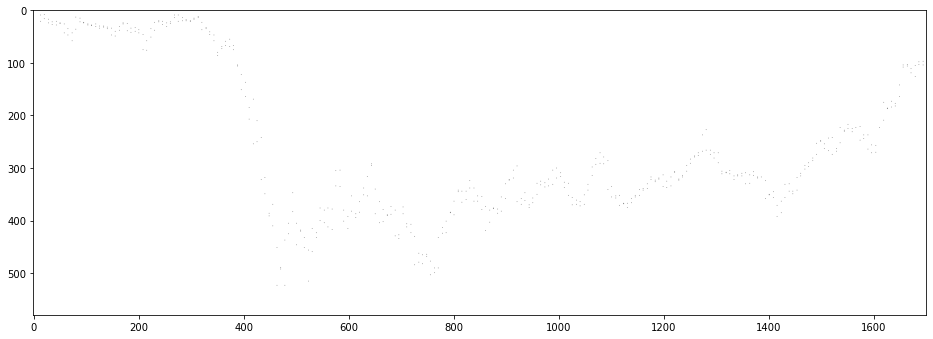

In [16]:
plt.figure(figsize=(16,6))
plt.imshow(255-ana_arr,cmap="gray")

In [24]:
x,y=np.where(ana_arr==255)

In [25]:
x=np.reshape(x,(x.shape[0],1))
y=np.reshape(y,(x.shape[0],1))
vali=0
valj=0
m = 0
for i in range(int(2*x.shape[0]/15)):
    for j in range(int(x.shape[0]/15)):
        x_=x[5*i:x.shape[0]-5*j]
        y_=y[5*i:x.shape[0]-5*j]
        reg = LinearRegression().fit(x_, y_)
        s =reg.score(x_,y_)
        if s>m:
            m=s
            vali = i
            valj = j
x_=x[5*vali:x.shape[0]-5*valj]
y_ = y[5*vali:x.shape[0]-5*valj]
reg = LinearRegression().fit(x_,y_)

In [26]:
print(reg.coef_)
print(reg.intercept_)

[[3.0865087]]
[266.35542463]


In [27]:
x_plot=np.linspace(0,n_arr.shape[0]-1, n_arr.shape[0]).astype('int')
y_plot=np.asarray(reg.predict(np.reshape(x_plot,(x_plot.shape[0],1))),int)

In [28]:
for i in range(n_arr.shape[0]):
        if y_plot[i]>0 and y_plot[i]<n_arr.shape[1]:
            n_arr[x_plot[i],y_plot[i]]=255

In [29]:
# Horizontal Lines calculation

h_val = []
period=int(img.size[1]/5)
for i in range(int(n_arr.shape[0]/period)):
    h_arr = ana_arr[period*i:period*(1+i)]
    sum_=0
    for j in range(period):
        sum_= sum_ + j*h_arr[j].sum()
    sum_ = sum_/(255*period) + period*i
    h_val.append(sum_)

In [30]:
# Trend Lines calculation

t_lines_up=[]
# t_lines_down=[]
period= 8
for i in range(period):
    x_min=n_arr.shape[0]
    y_min=n_arr.shape[1]
    x_max=0
    y_max=0
    
#     x_min_down=n_arr.shape[0]
#     y_min_down=n_arr.shape[1]
#     x_max_down=0
#     y_max_down=0
    
    p_arr=ana_arr[:,int(n_arr.shape[1]*i/period):int(n_arr.shape[1]*(i+1)/period)]
    for j in range(p_arr.shape[1]):
        if 255 in p_arr[:,j]:
#             z_x=int((list(p_arr[:,j]).index(255)+list(p_arr[:,j]).index(255,list(p_arr[:,j]).index(255)+1))/2)
            
            z_x = list(p_arr[:,j]).index(255)
#             z_x_down = list(p_arr[:,j]).index(255,list(p_arr[:,j]).index(255)+1)
            z_y=j
            
            if z_x>x_max:
                x_max=z_x
                y_max=z_y+int(n_arr.shape[1]*i/period)
            if z_x<x_min:
                x_min = z_x
                y_min = z_y+int(n_arr.shape[1]*i/period)
#         if p_arr[:,j].sum()>255:
            
#             z_x_down = int((list(p_arr[:,j]).index(255)+list(p_arr[:,j]).index(255,list(p_arr[:,j]).index(255)+1))/2)
# #             z_x_down = list(p_arr[:,j]).index(255,list(p_arr[:,j]).index(255)+1)
#             z_y=j
            
#             if z_x_down>x_max_down:
#                 x_max_down=z_x_down
#                 y_max_down = z_y + int(n_arr.shape[1]*i/period)
            
#             if z_x_down< x_min_down:
#                 x_min_down = z_x_down
#                 y_min_down = z_y+int(n_arr.shape[1]*i/period)
    
    t_lines_up.append([(x_min,y_min),(x_max,y_max)])
#     t_lines_down.append([(x_min_down,y_min_down),(x_max_down,y_max_down)])

In [31]:
t_lines_up

[[(8, 21), (46, 209)],
 [(9, 269), (185, 411)],
 [(210, 426), (489, 471)],
 [(292, 644), (490, 764)],
 [(296, 921), (380, 869)],
 [(237, 1274), (367, 1124)],
 [(227, 1281), (371, 1416)],
 [(97, 1694), (263, 1529)]]

In [287]:
# Head and Shoulders calculation

period= 20
hs=[]
for i in range(period):
    x_l_min = 0
    y_l_min = 0
    x_r_min = 0
    y_r_min = 0
    x_top = n_arr.shape[0]
    y_top = n_arr.shape[1]
    hs_arr=ana_arr[:,int(n_arr.shape[1]*i/period):int(n_arr.shape[1]*(i+1)/period)]
    for j in range(hs_arr.shape[1]):
        if 255 in hs_arr[:,j]:
            z_x = list(hs_arr[:,j]).index(255)
            z_y=j
            
            if z_x<x_top:
                x_top = z_x
                y_top = z_y+int(n_arr.shape[1]*i/period)
    
    for j in range(hs_arr.shape[1]):
        if 255 in hs_arr[:,j]:
            z_x = list(hs_arr[:,j]).index(255)
            if hs_arr[:,j].sum()>255:
                z_x = int((list(hs_arr[:,j]).index(255)+list(hs_arr[:,j]).index(255,list(hs_arr[:,j]).index(255)+1))/2) 
            z_y=j
            
            if z_y+int(n_arr.shape[1]*i/period)<y_top and z_x>x_l_min:
                x_l_min = z_x
                y_l_min = z_y+int(n_arr.shape[1]*i/period)
            elif z_y+int(n_arr.shape[1]*i/period)>=y_top and z_x>x_r_min:
                x_r_min = z_x
                y_r_min = z_y + int(n_arr.shape[1]*i/period)
    if x_r_min==0:
        x_r_min=x_top
        y_r_min=y_top
    if x_l_min==0:
        x_l_min=x_top
        y_l_min=y_top
    hs.append([(x_l_min,y_l_min),(x_top,y_top),(x_r_min,y_r_min)])
    
hns=[]
for i in range(1,len(hs)-1):
    if hs[i-1][1][0]-hs[i][1][0]>10 and hs[i+1][1][0]-hs[i][1][0]>10:
        hns.append(hs[i-1])
        hns.append(hs[i])
        hns.append(hs[i+1])

In [288]:
# Head and Shoulders
hns_plot=[]
for i in range(len(hns)):
    if i==0:
        hns_plot.append([hns[i][0],hns[i][1],max(hns[i][2],hns[i+1][0])])
    elif i==len(hns)-1:
        hns_plot.append([max(hns[i][0],hns[i-1][2]),hns[i][1],hns[i][2]])
    else:
        hns_plot.append([max(hns[i][0],hns[i-1][2]),hns[i][1],max(hns[i+1][0],hns[i][2])])
# Neck line for head and shoulders
neck_hns=[]
for i in range(len(hns_plot)):
    if i==0:
        neck_hns.append([hns_plot[i][0],hns_plot[i][2]])
    elif i==len(hns_plot) -1 :
        neck_hns.append([hns_plot[i][0],hns_plot[i][2]])
    else:
        neck_hns.append([hns_plot[i][0],hns_plot[i][2]])

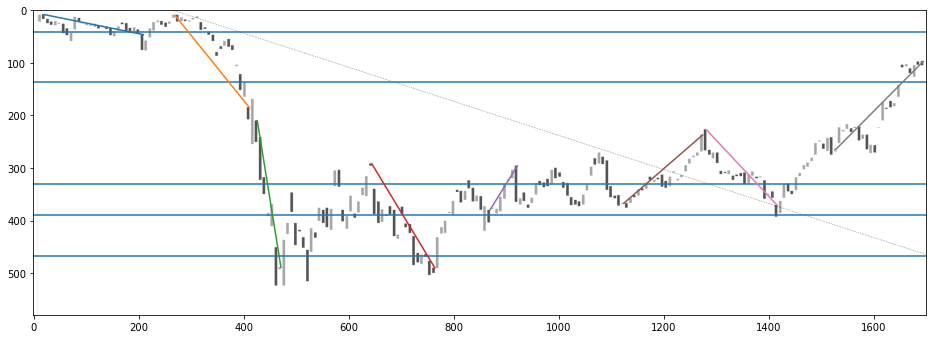

In [34]:
plt.figure(figsize=(16,6))
plt.imshow(255-n_arr,cmap="gray")

# Plot horizontal lines

for i in h_val:
    plt.axhline(i)

# Plot trendlines

for i in t_lines_up:
    plt.plot([i[0][1],i[1][1]],[i[0][0],i[1][0]])

# # Plot head and shoulders

# for u in hns_plot:
#     plt.plot([u[0][1],u[1][1],u[2][1]],[u[0][0],u[1][0],u[2][0]])
# for a in neck_hns:
#     plt.plot([a[0][1],a[1][1]],[a[0][0],a[1][0]])

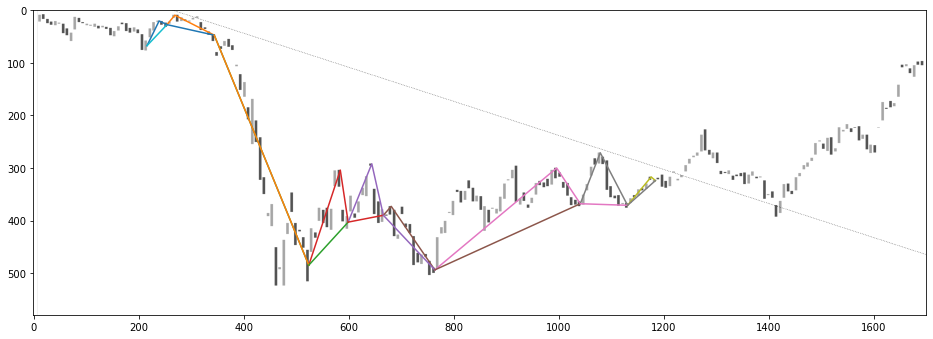

In [290]:
plt.figure(figsize=(16,6))
plt.imshow(255-n_arr,cmap="gray")

# Plot head and shoulders

for u in hns_plot:
    plt.plot([u[0][1],u[1][1],u[2][1]],[u[0][0],u[1][0],u[2][0]])
for a in neck_hns:
    plt.plot([a[0][1],a[1][1]],[a[0][0],a[1][0]])

In [291]:
# Finding that whether the stock is trending or not recently.

t_lines=[]
period= 5
for i in range(period-1,period):
    x_min=n_arr.shape[0]
    y_min=n_arr.shape[1]
    x_max=0
    y_max=0
    
    p_arr=ana_arr[:,int(n_arr.shape[1]*i/period):int(n_arr.shape[1]*(i+1)/period)]
    for j in range(p_arr.shape[1]):
        if 255 in p_arr[:,j]:
            
            z_x = list(p_arr[:,j]).index(255)
            z_y=j
            
            if z_x>x_max:
                x_max=z_x
                y_max=z_y+int(n_arr.shape[1]*i/period)
            if z_x<x_min:
                x_min = z_x
                y_min = z_y+int(n_arr.shape[1]*i/period)
    
    t_lines.append([(x_min,y_min),(x_max,y_max)])

# slope of last trendline
slope = -(t_lines[0][0][0]-t_lines[0][1][0])/(t_lines[0][0][1]-t_lines[0][1][1])
if slope>0.5:
    print("Uptrending")
elif slope<0.5:
    print("Downtrending")
else:
    print("Sideways")

Uptrending
